In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
two_blobs = pd.read_csv('cluster_two_blobs.csv')

In [3]:
two_blobs_outliers = pd.read_csv('cluster_two_blobs_outliers.csv')

<Axes: xlabel='X1', ylabel='X2'>

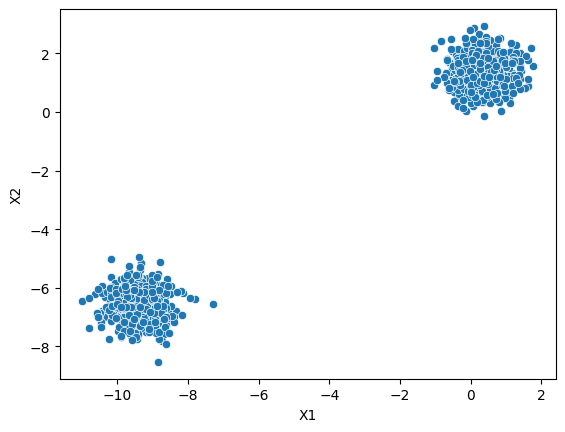

In [4]:
sns.scatterplot(data = two_blobs, x = 'X1', y = 'X2')

<Axes: xlabel='X1', ylabel='X2'>

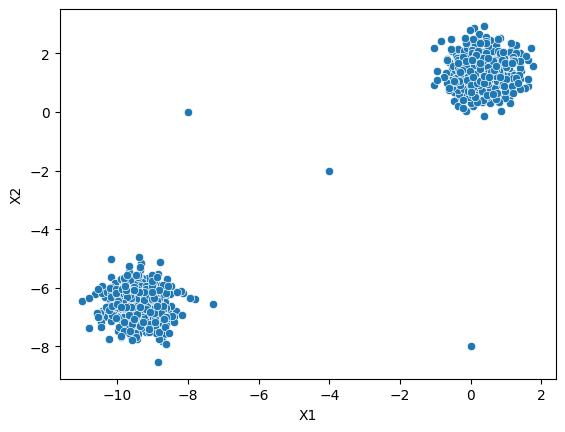

In [5]:
sns.scatterplot(data = two_blobs_outliers, x = 'X1', y = 'X2')

The Cluster Display Function:

In [6]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data = data, x = 'X1', y = 'X2', hue = labels, palette = 'Set1')

A Default DBSCAN Model:

In [7]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN()
#Remember: The default values for the two most important hyperparameters are eps = 0.5 and min_samples = 5

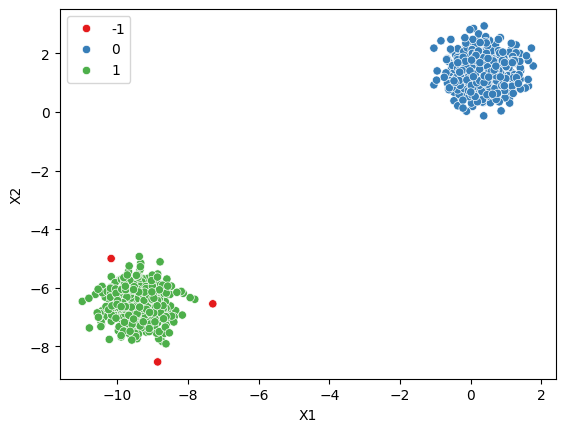

In [ ]:
display_categories(dbscan, two_blobs)
#With default parameters, DBSCAN detects that three points that are a tad outside cluster 1 are outliers in the dataset that isn't supposed to have outliers, denoted by cluster code -1

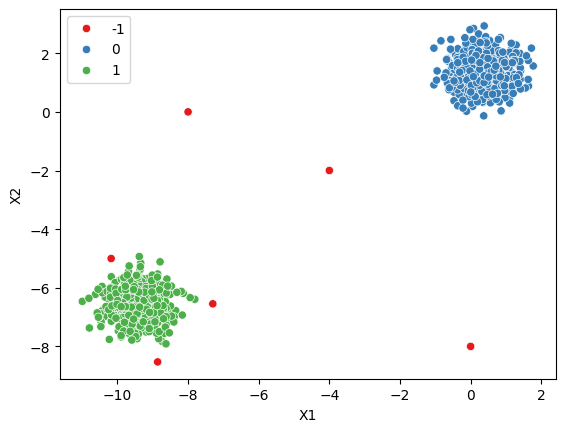

In [ ]:
display_categories(dbscan, two_blobs_outliers)
#DBSCAN picks up the 3 obvious outliers, but also continues to mark the three points around cluster 1 as outliers as well

The Epsilon Hyperparameter:

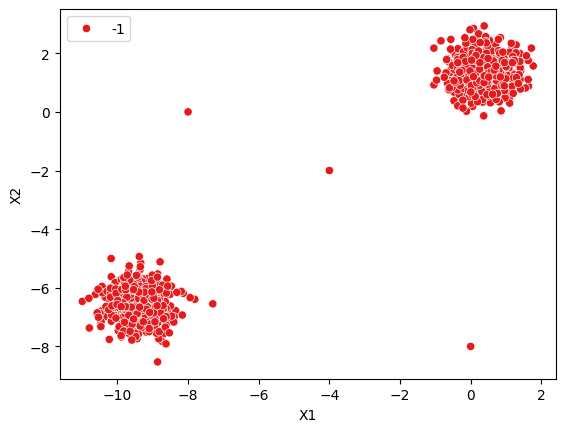

In [11]:
dbscan = DBSCAN(eps = 0.001)
display_categories(dbscan, two_blobs_outliers)
#The eps (epsilon) parameter is the maximum distance between tow samples for one to be considered in the same neighborhood as the other
#As epsilon gets smaller, eventually, everything will become an outlier

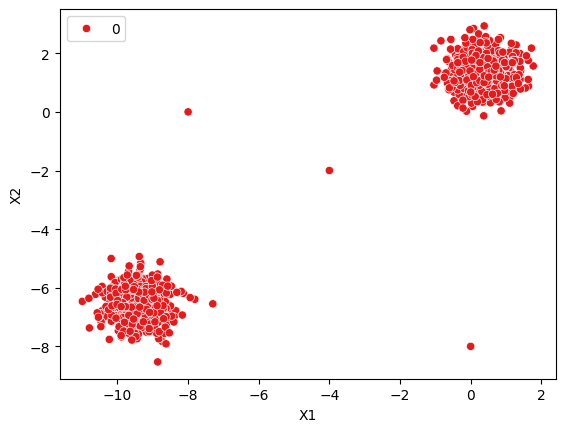

In [12]:
dbscan = DBSCAN(eps = 10)
display_categories(dbscan, two_blobs_outliers)
#When epsilon gets too large, everything becomes one cluster

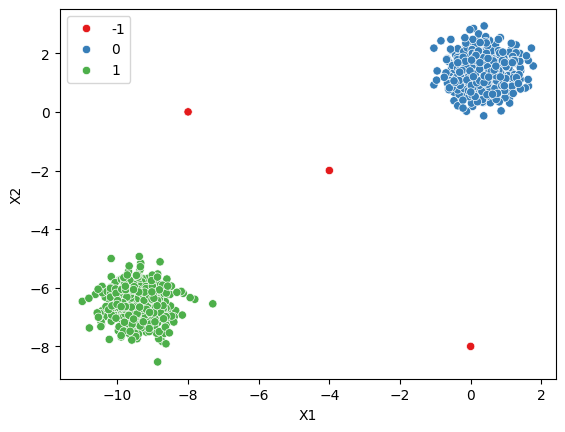

In [ ]:
dbscan = DBSCAN(eps = 1)
display_categories(dbscan, two_blobs_outliers)
#For this data set, an epsilon value of 1 produces the desired output where the 3 points far away from the blobs are outliers but all the points that should be within the blob extents are in their appropriate clusters

In [14]:
dbscan.labels_

array([ 0,  1,  0, ..., -1, -1, -1], shape=(1003,))

In [ ]:
np.sum(dbscan.labels_ == -1)
#Measuring the number of outliers found

np.int64(3)

In [16]:
100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
#Calculating the percent of the total points that are outliers

np.float64(0.29910269192422734)

In [17]:
len(dbscan.labels_)

1003

Using The Elbow Method With The Epsilon Hyperparameter:

In [20]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001, 10, 100):

    dbscan = DBSCAN(eps = eps)
    dbscan.fit(two_blobs_outliers)

    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

<Axes: >

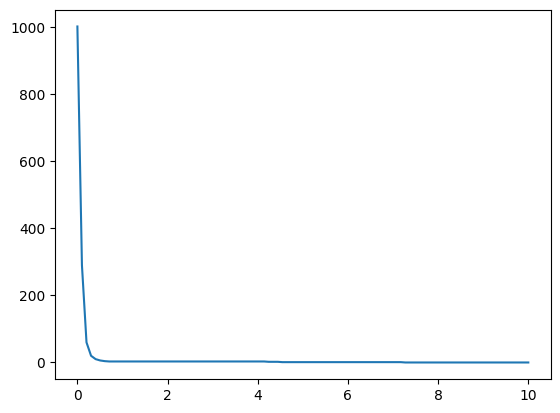

In [ ]:
sns.lineplot(x = np.linspace(0.001, 10, 100), y = number_of_outliers)
#The inflection point (where the sharp curve occurs) is the critical region of this elbow plot; try zooming in on it

(0.0, 2.0)

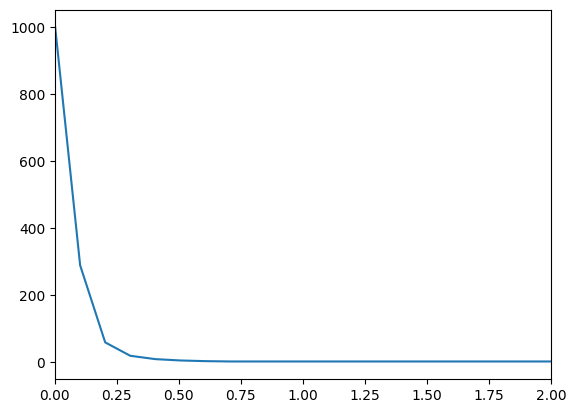

In [ ]:
sns.lineplot(x = np.linspace(0.001, 10, 100), y = number_of_outliers)
plt.xlim(0, 2)
#The curve is currently a bit jagged; try using a higher density of epsilon values

In [23]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001, 7, 200):

    dbscan = DBSCAN(eps = eps)
    dbscan.fit(two_blobs_outliers)

    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

(0.0, 2.0)

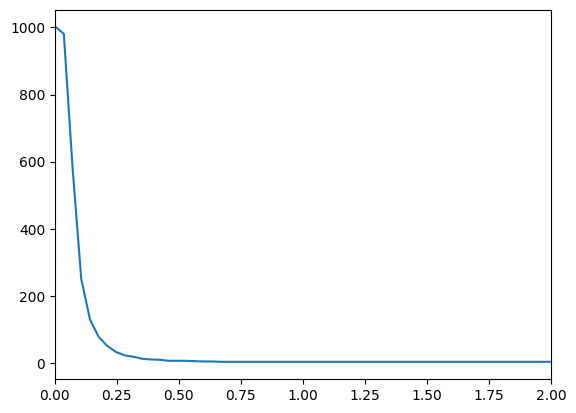

In [ ]:
sns.lineplot(x = np.linspace(0.001, 7, 200), y = number_of_outliers)
plt.xlim(0, 2)

Text(0, 0.5, 'Percent of Points classified as Outliers')

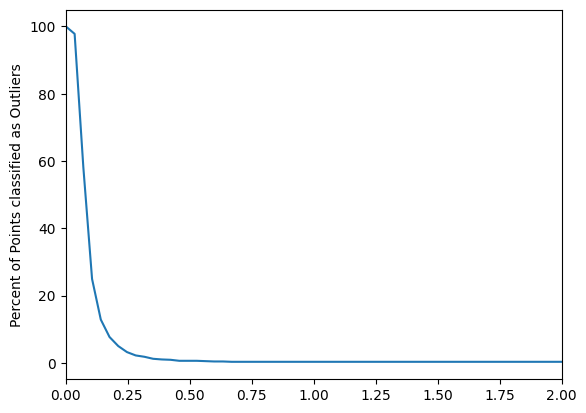

In [ ]:
sns.lineplot(x = np.linspace(0.001, 7, 200), y = outlier_percent)
plt.xlim(0, 2)
plt.ylabel('Percent of Points classified as Outliers')
#Notice that the outlier percent plot has nearly the same shape as the outlier count plot, but pay attention to the y axis range

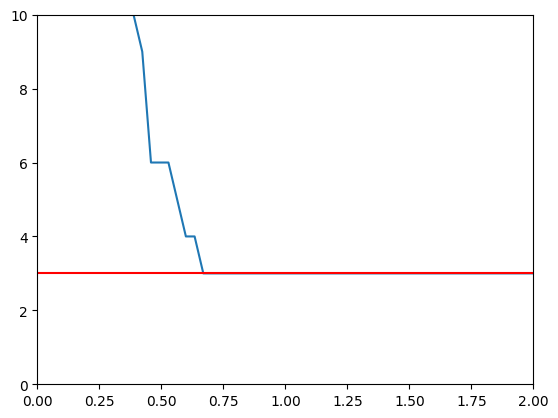

In [ ]:
sns.lineplot(x = np.linspace(0.001, 7, 200), y = number_of_outliers)
plt.xlim(0, 2)
plt.ylim(0, 10)
plt.hlines(y = 3, xmin = 0, xmax = 2, color = 'red')
#At an epsilon of around 0.75, the model begins to pick up that there are 3 outliers

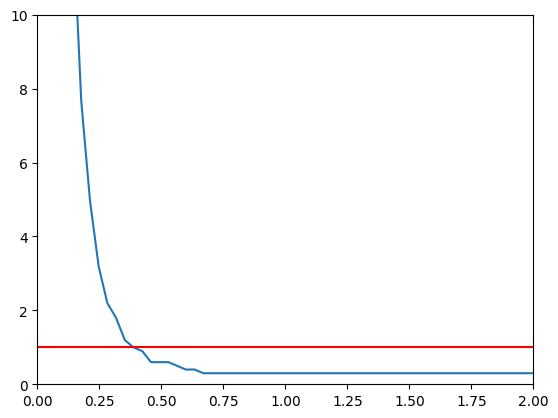

In [33]:
sns.lineplot(x = np.linspace(0.001, 7, 200), y = outlier_percent)
plt.xlim(0, 2)
plt.ylim(0, 10)
plt.hlines(y = 1, xmin = 0, xmax = 2, color = 'red')
#Red line is now at 1% outliers

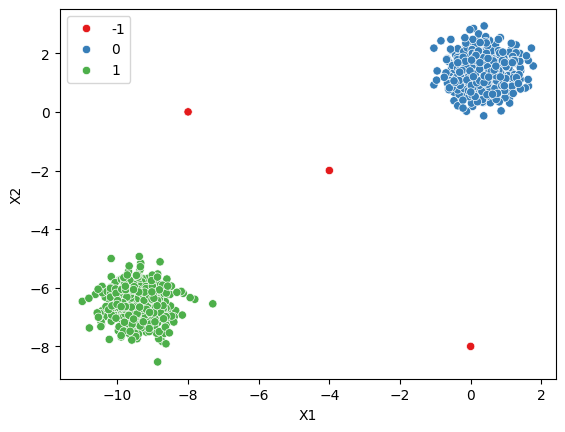

In [29]:
dbscan = DBSCAN(eps = 0.75)
display_categories(dbscan, two_blobs_outliers)

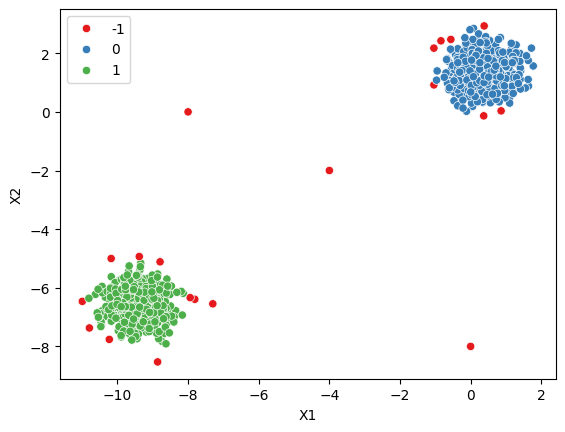

In [30]:
dbscan = DBSCAN(eps = 0.3)
display_categories(dbscan, two_blobs_outliers)
#When eps falls below 0.75, the model picks up more points as outliers

In [34]:
#Creating an even more dense elbow plot within a smaller range
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001, 1, 100):

    dbscan = DBSCAN(eps = eps)
    dbscan.fit(two_blobs_outliers)

    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

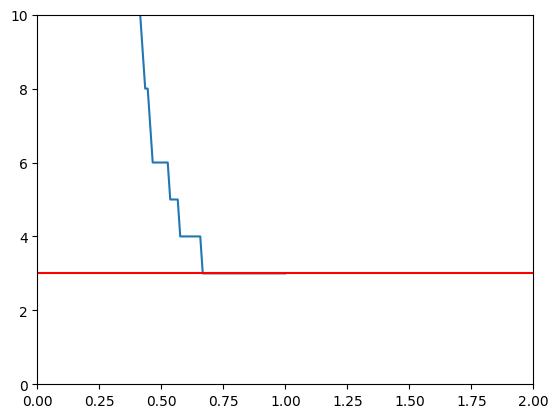

In [35]:
sns.lineplot(x = np.linspace(0.001, 1, 100), y = number_of_outliers)
plt.xlim(0, 2)
plt.ylim(0, 10)
plt.hlines(y = 3, xmin = 0, xmax = 2, color = 'red')

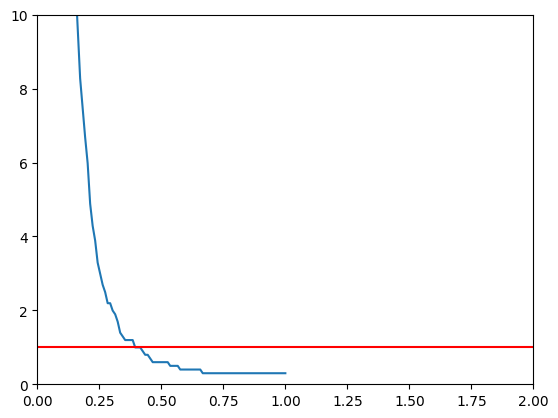

In [36]:
sns.lineplot(x = np.linspace(0.001, 1, 100), y = outlier_percent)
plt.xlim(0, 2)
plt.ylim(0, 10)
plt.hlines(y = 1, xmin = 0, xmax = 2, color = 'red')

The Min_samples Hyperparameter:

In [ ]:
outlier_percent = []
number_of_outliers = []

for n in np.arange(1, 100):

    dbscan = DBSCAN(min_samples = n) #The min_samples paramater specifies the number of samples (or total weight) in a neighborhood for a point to be considered as a core point
    dbscan.fit(two_blobs_outliers)

    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

Text(0, 0.5, 'Pct. of points classified as an outlier')

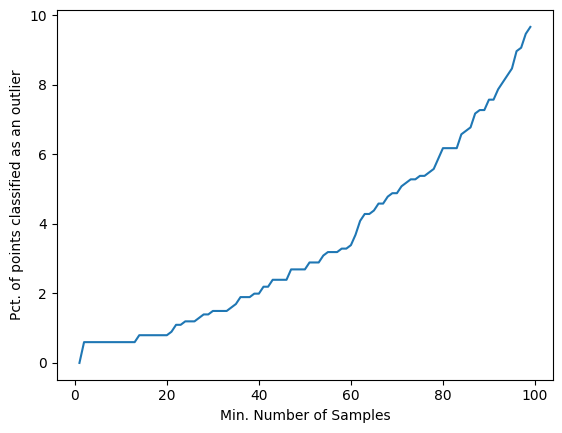

In [40]:
sns.lineplot(x = np.arange(1, 100), y = outlier_percent)
plt.xlabel('Min. Number of Samples')
plt.ylabel('Pct. of points classified as an outlier')
#Notice that increasing min_samples has the opposite effect on the outlier count and percent as does increasing eps

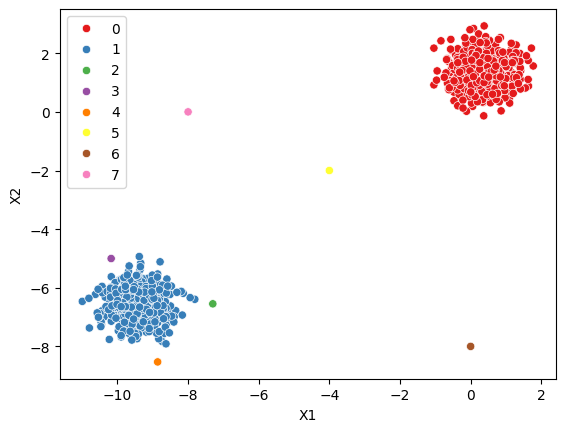

In [ ]:
dbscan = DBSCAN(min_samples = 1)
display_categories(dbscan, two_blobs_outliers)
#Also notice that at extremely low min_samples values, while points are no longer being considered outliers, the points that used to be are now being considered their own clusters!

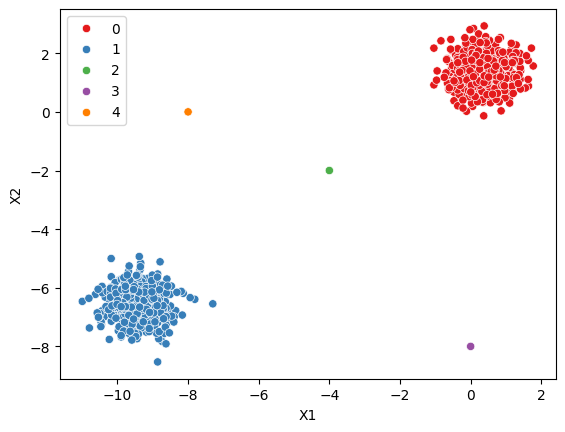

In [ ]:
dbscan = DBSCAN(min_samples = 1, eps = 0.75)
display_categories(dbscan, two_blobs_outliers)
#With min_samples = 1, you never get outliers

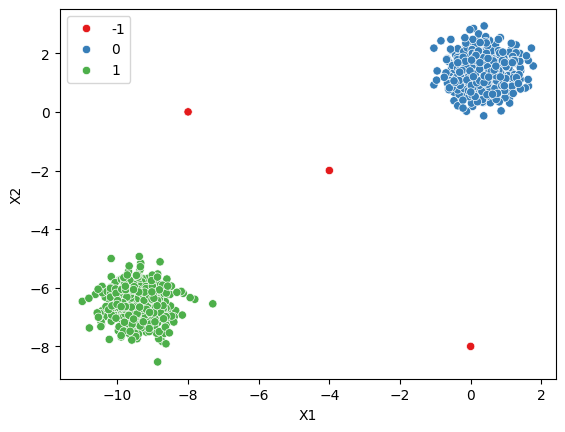

In [43]:
dbscan = DBSCAN(min_samples = 3, eps = 0.75)
display_categories(dbscan, two_blobs_outliers)

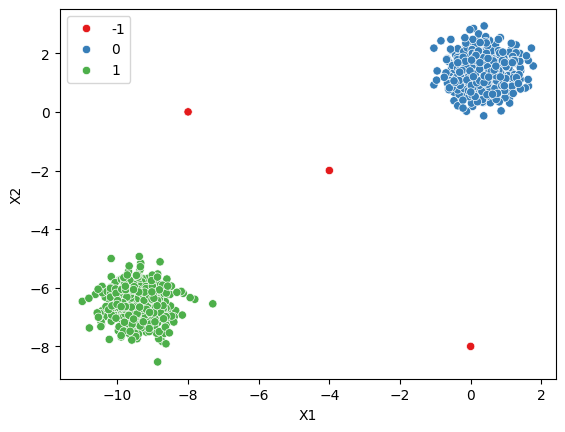

In [44]:
num_dim = two_blobs_outliers.shape[1]
dbscan = DBSCAN(min_samples = 2 * num_dim, eps = 0.75)
display_categories(dbscan, two_blobs_outliers)
#Often times, twice the number of dimensions of the data makes for a good starting point for min_samples